In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pyreadstat
!pip install pgmpy==0.1.11
!pip install scikit-learn==1.0.1
!pip install pandas==1.3.4

#Dataset Download

In [ ]:
import pandas as pd
df = pd.read_spss('/content/drive/MyDrive/COVID Info SPSS Data Set 9-24-21.sav')

# Data Analysis 

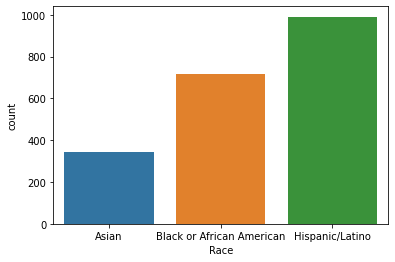

In [ ]:
 import seaborn as sns

sns.countplot(x ='Race', data = df)

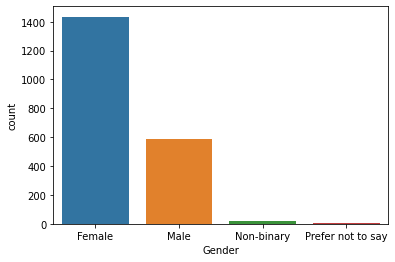

In [ ]:
sns.countplot(x ='Gender', data = df)

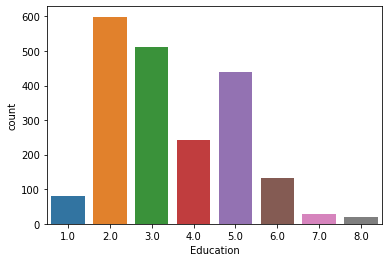

In [ ]:
sns.countplot(x ='Education', data = df)

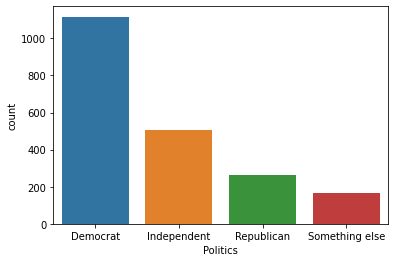

In [ ]:
sns.countplot(x ='Politics', data = df)

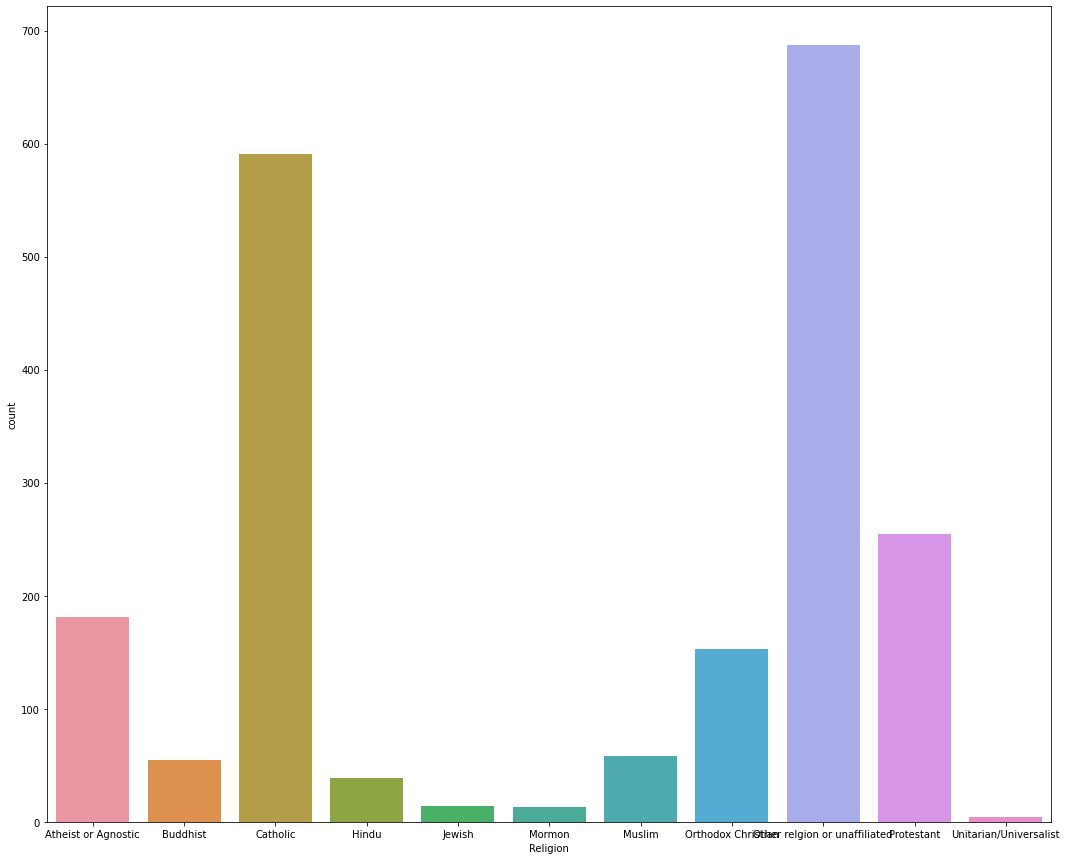

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(18,15))
sns.countplot(x ='Religion', data = df)

# Dataset Process

## Drop columns with Null values

In [ ]:
nan_col_count = 0
nan_col_list = []
for i in df.columns:
    if df[i].isna().sum() > 0:
        nan_col_count = nan_col_count + 1
        print(i,df[i].isna().sum())
        if i!= 'Vaccinewillingness':
            nan_col_list.append(i)

print("Count of columns having NaN values: ",nan_col_count)
df.drop(columns=nan_col_list,inplace=True)

Worklocation 626
NonEnglishlanguageinformingimportance 1384
NonEnglishhealthinfoaccessibility 1384
NonEnglishhealthinfoQuality 1384
Use_newswebsites 1295
Use_TV 1133
Use_searchengine 1043
Use_socialmedia 1308
Use_healthcareprovider 1094
Use_friendsfamily 1372
Use_scientificsource 1543
Use_printmedia 1845
Use_radio 1805
Use_podcasts 1911
Use_onlineforum 1826
Use_governmentsource 1345
Use_religioussource 1974
Vaccinetype 686
Vaccineeagerness 686
Vaccinewillingness 1364
Count of columns having NaN values:  20


## Label Encoding 

In [ ]:
df['label'] = df['Vaccinationstatus'].astype(str) + df['Vaccinewillingness'].astype(str)
df['label'] = df['label'].map({'Yesnan': 1,'NoYes': 1, 'NoNo':0, 'NoNot sure':0})
df.label = df.label.astype(float)
df.drop(columns=['Vaccinewillingness','Vaccinationstatus'],inplace=True)


## Encoding Schema (One hot encoding + Label encoding) 

In [ ]:
nom_col_list = []
for j in df.columns:
    if df[j].dtype != float:
        nom_col_list.append(j)
df.drop(columns=['SpecificCOVIDinfosource'],inplace = True)
nom_col_list.remove('SpecificCOVIDinfosource')

race_col = pd.get_dummies(df.Race) #Race will be encoded as one hot encdoing
plotics_col = pd.get_dummies(df.Politics) #Politics will be encoded as one hot encdoing. 
Religin_col = pd.get_dummies(df.Religion) #Religion will be encoded as one hot encdoing. 
Employment_col = pd.get_dummies(df.Employment) #Employment will be encoded as one hot encdoing. 

#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in nom_col_list:
    df[feat] = le.fit_transform(df[feat].astype(str))


df.drop(columns=['Race'],inplace = True)
df.drop(columns=['Politics'],inplace = True)
df.drop(columns=['Religion'],inplace = True)
df.drop(columns=['Employment'],inplace = True) 


df = pd.concat([df, race_col], axis=1)
df = pd.concat([df, plotics_col], axis=1)
df = pd.concat([df, Religin_col], axis=1)
df = pd.concat([df, Employment_col], axis=1)


#Dropping surveytime and duration
df.drop(columns=['SurveyTime','Duration'],inplace=True)
df.drop(columns=['LocationLatitude','LocationLongitude'],inplace=True)

# Over 60 and over will be handle it as 60
df['Age'] = df['Age'].replace(['60 and over'],60)


In [ ]:
y = df['label'].astype(int)
X = df

## Correlation Matrix

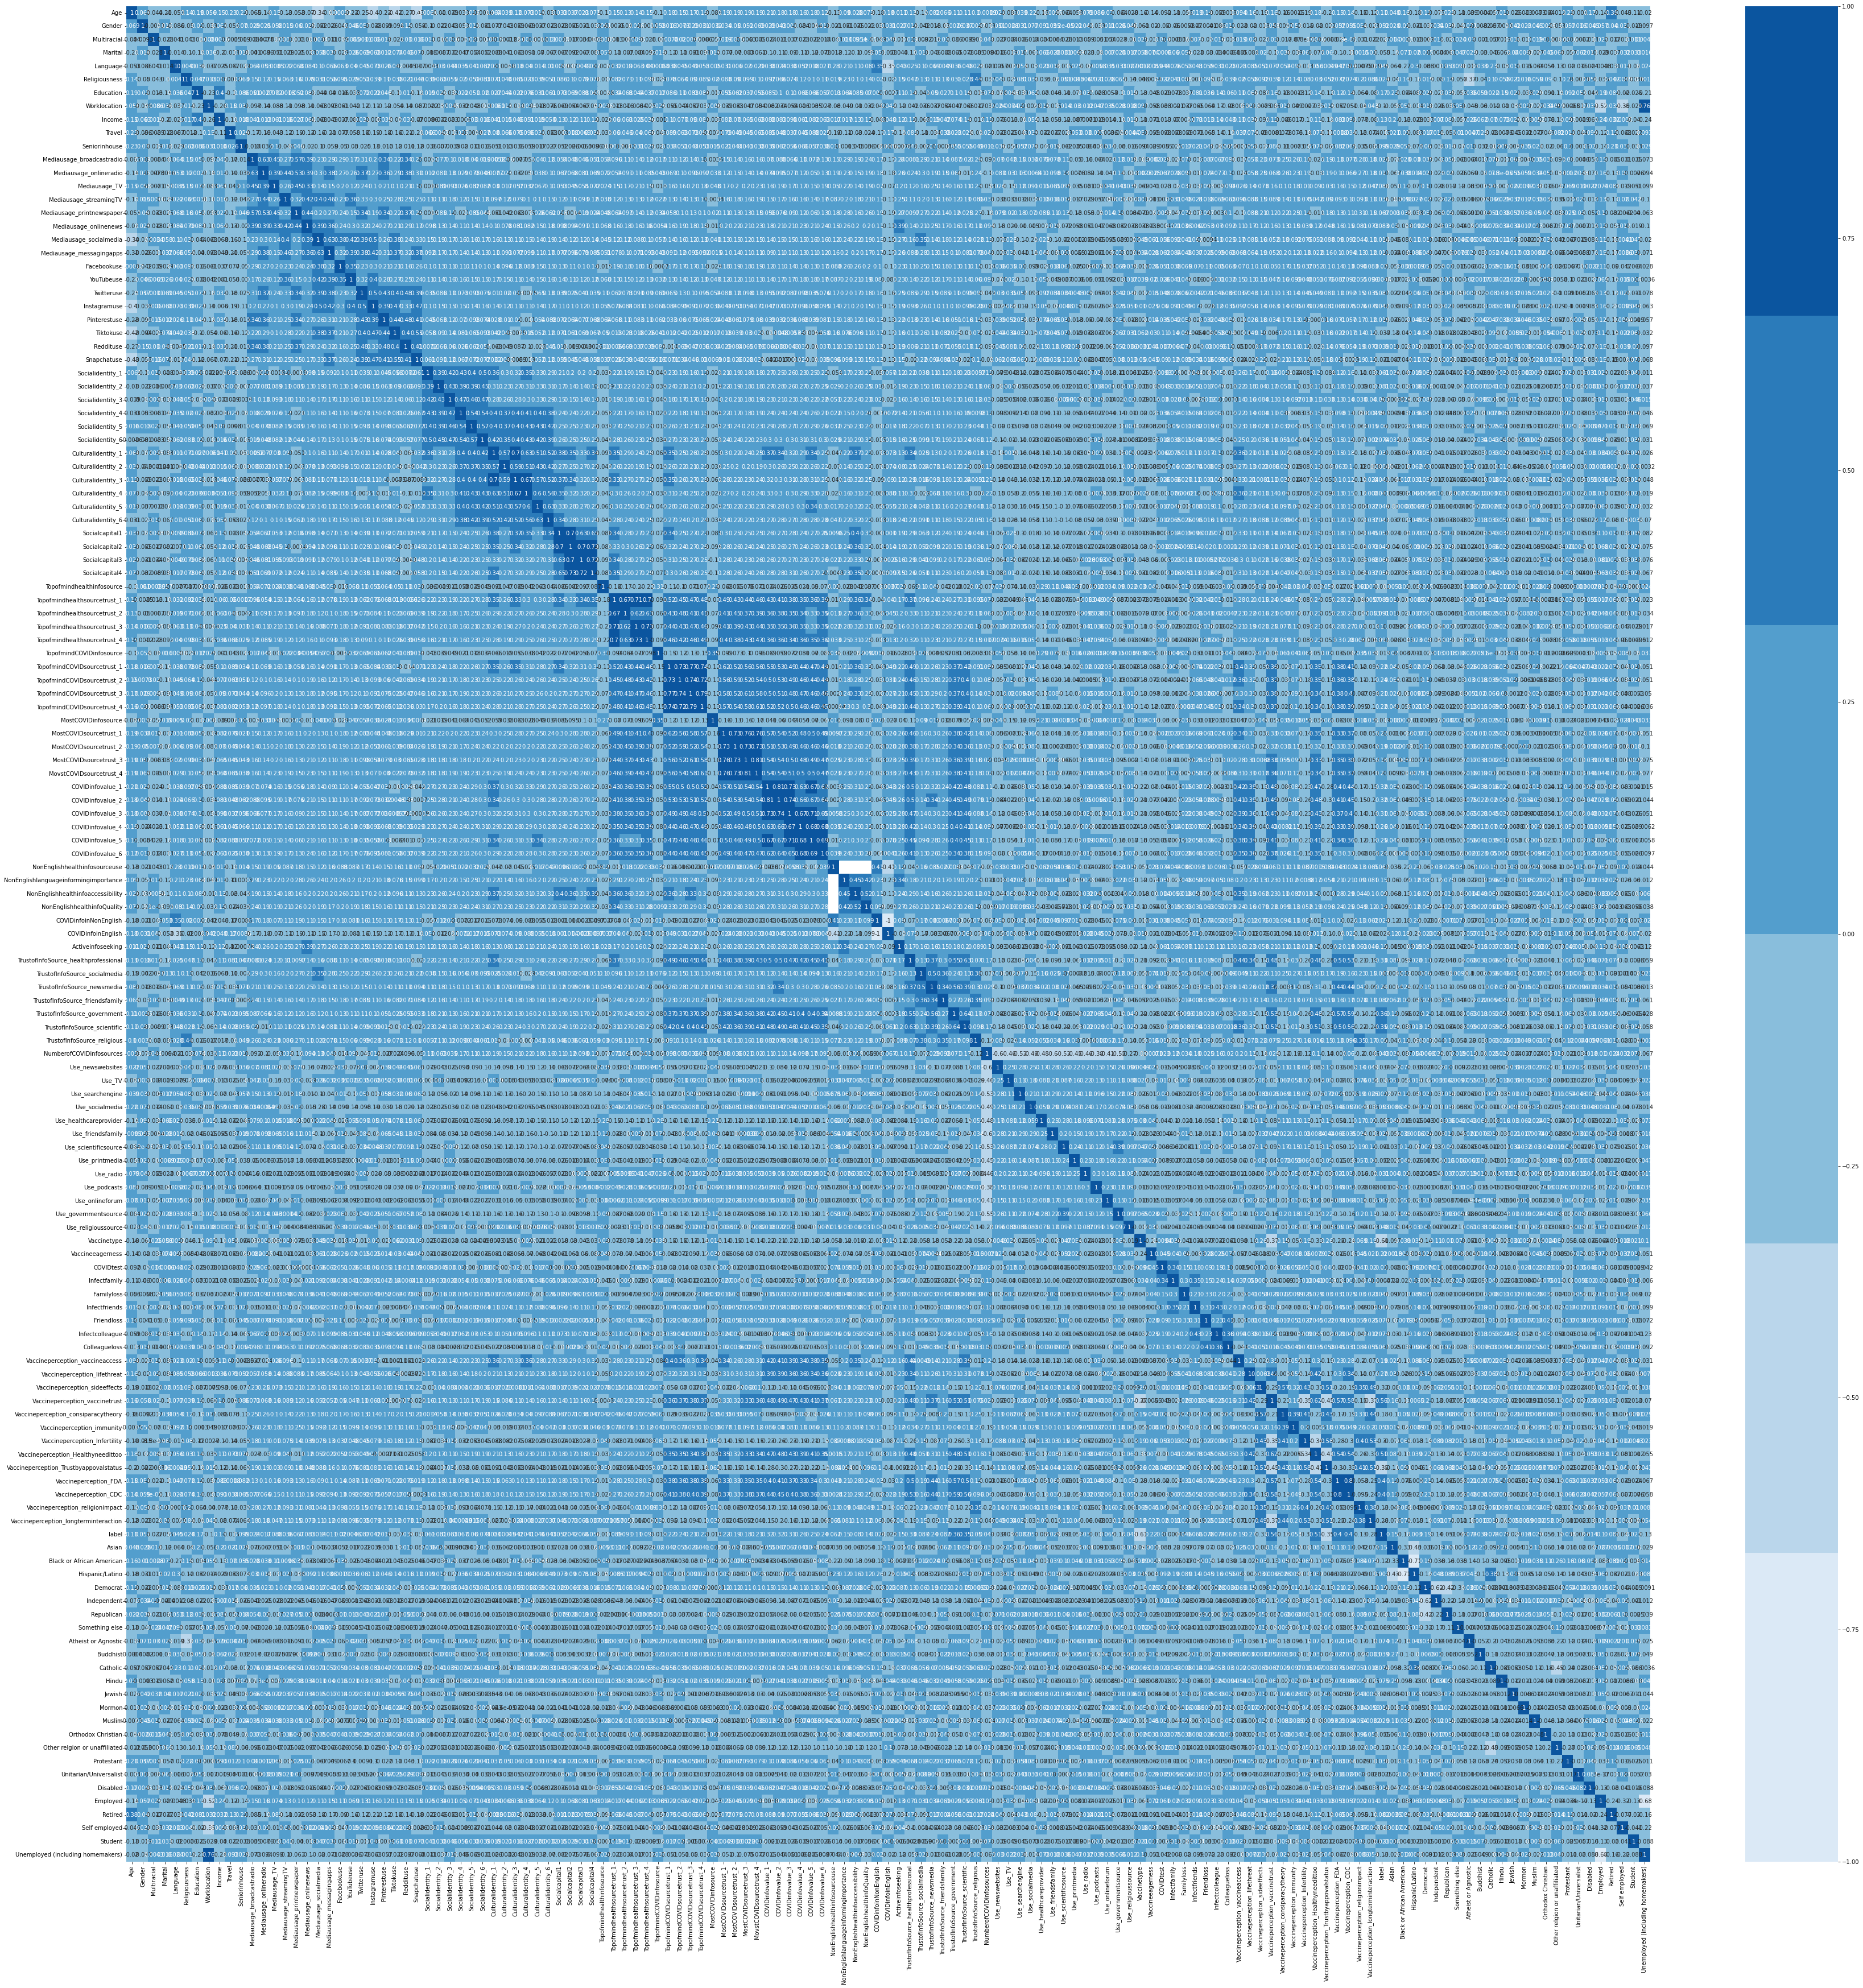

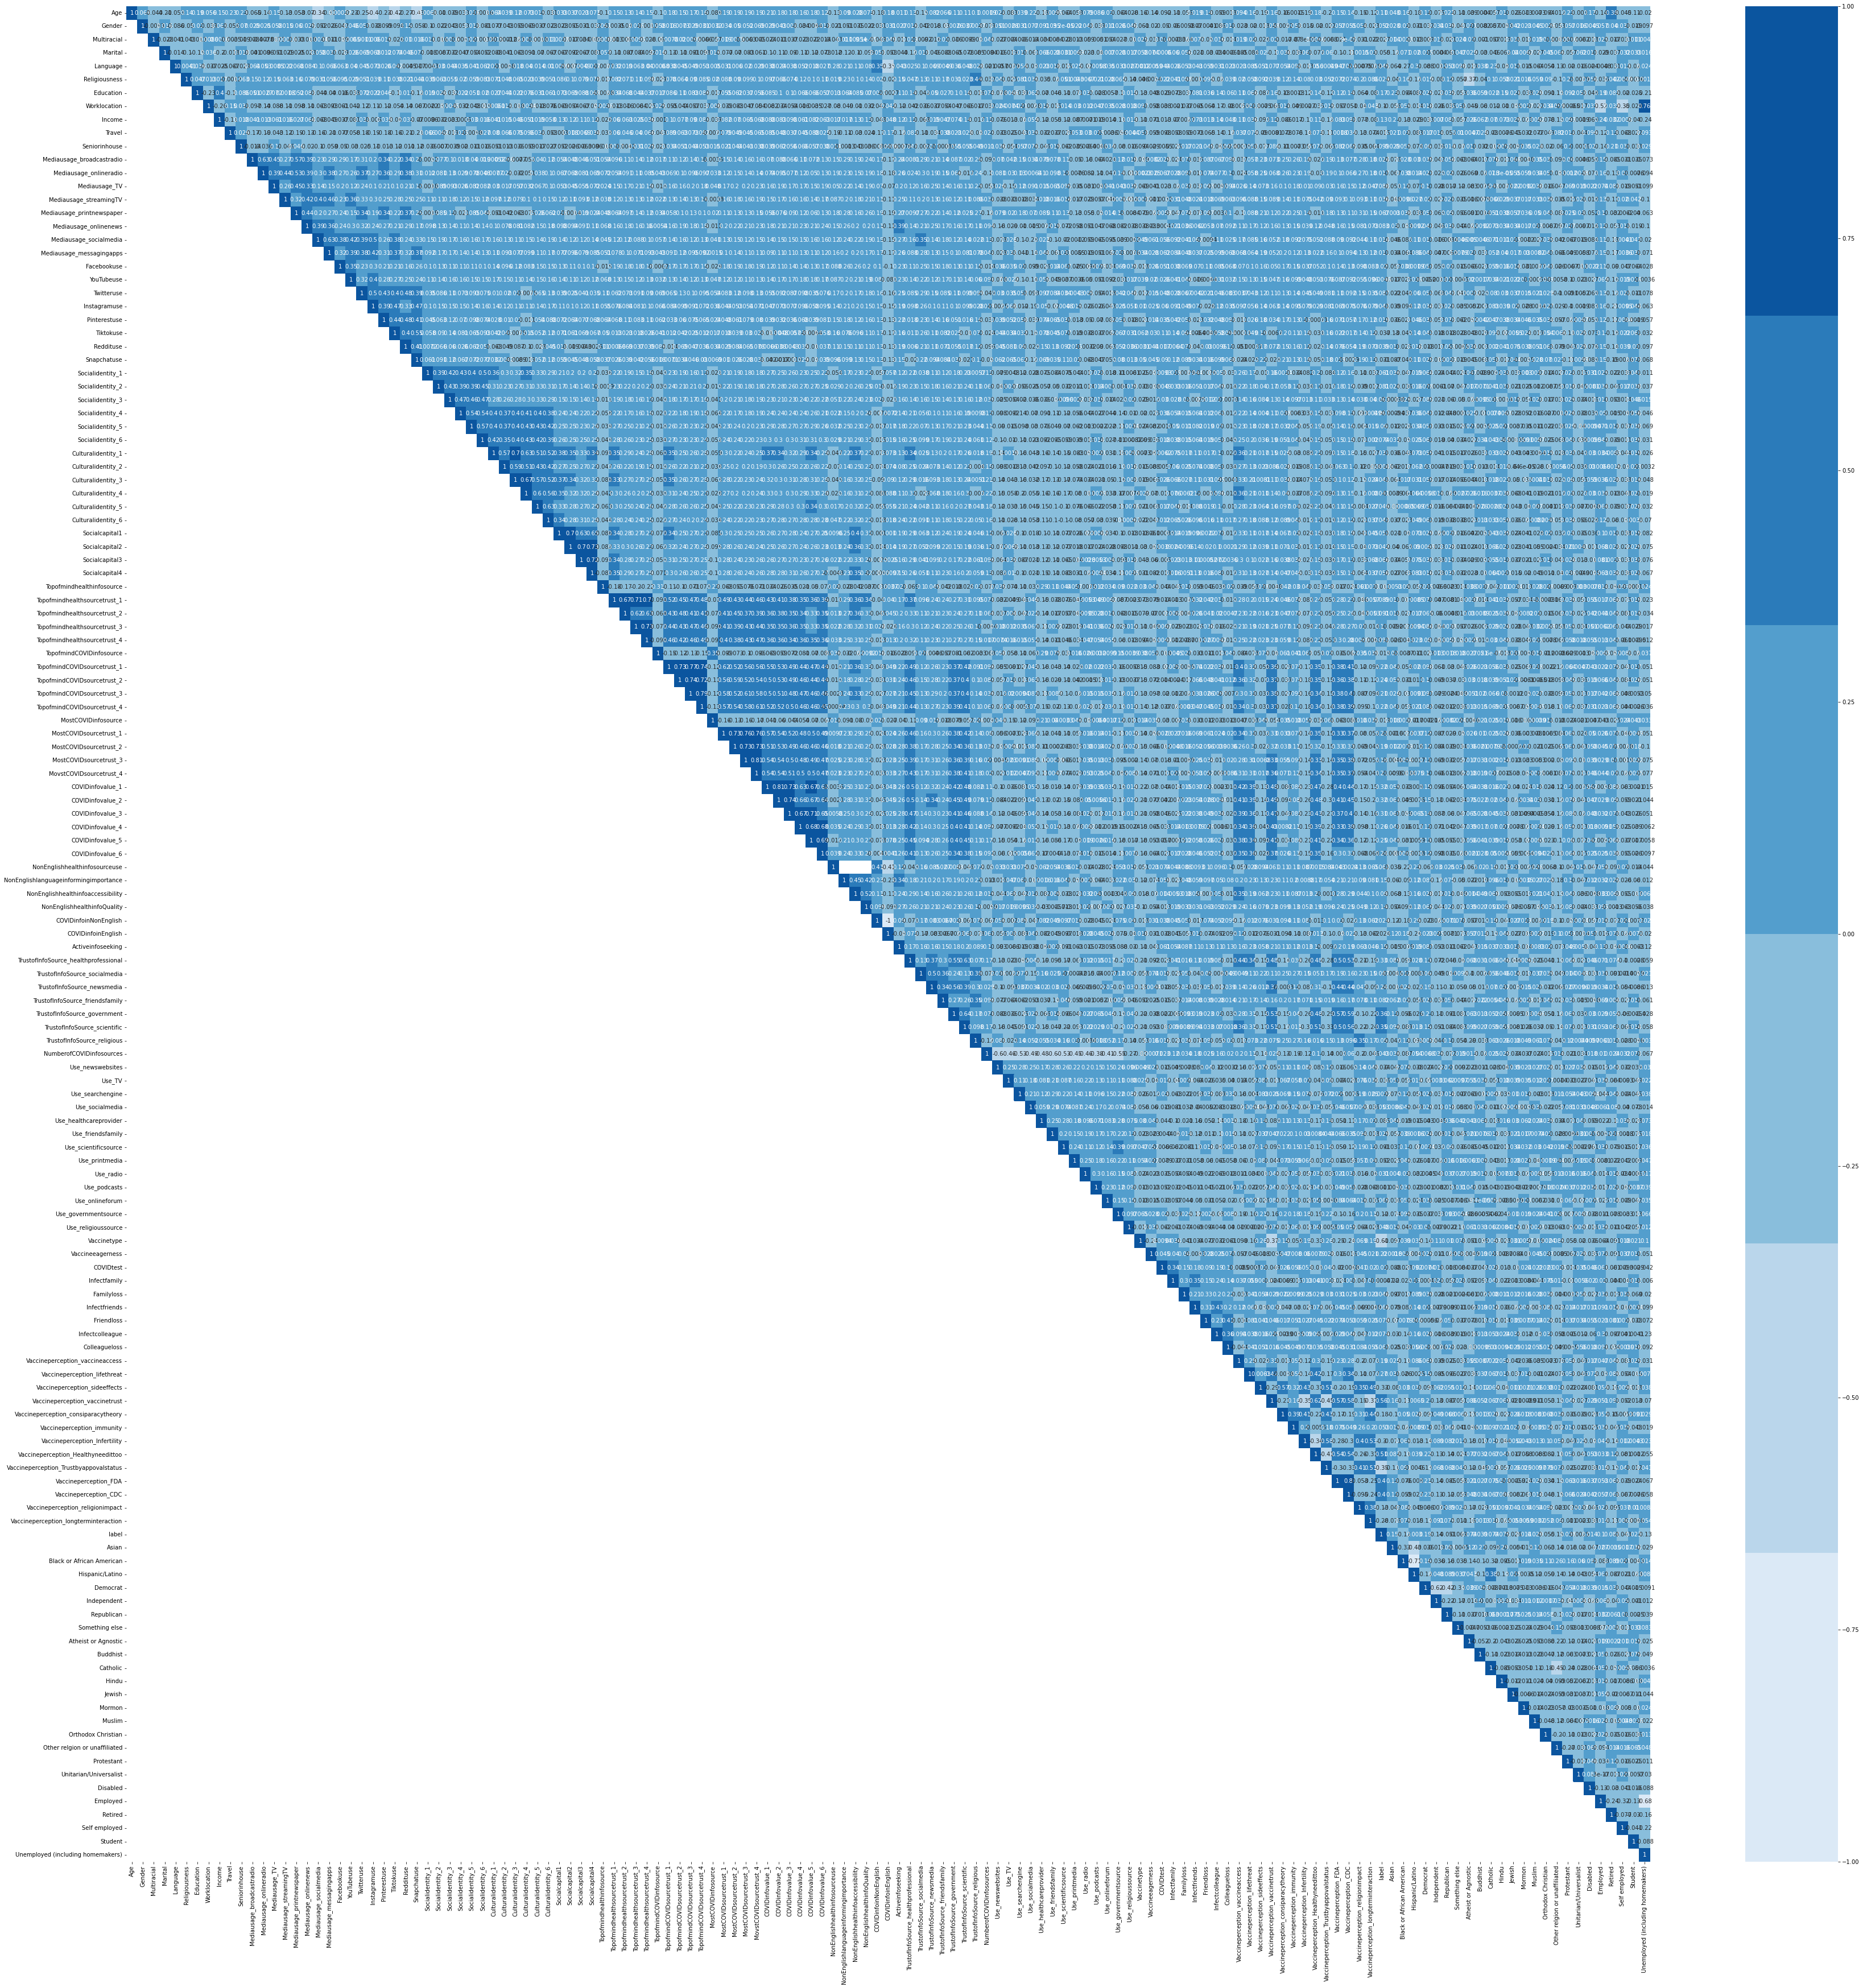

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(60,60))
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True, cmap = sn.color_palette('Blues'))
plt.show()

#get correlations of each features in dataset
plt.figure(figsize=(60,60))
corrMatrix = df.corr()

# # # Select upper triangle of correlation matrix
upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=0).astype(np.bool))

sn.heatmap(upper, annot=True, cmap = sn.color_palette('Blues'))
plt.show()

In [ ]:
df.drop(columns=['label'],inplace=True)
df.drop(columns=['COVIDinfovalue_1'],inplace=True)
df.drop(columns=['COVIDinfovalue_2'],inplace=True)
df.drop(columns=['COVIDinfovalue_6'],inplace=True)
df.drop(columns=['COVIDinfovalue_3'],inplace=True)
df.drop(columns=['COVIDinfovalue_5'],inplace=True)
df.drop(columns=['COVIDinfovalue_4'],inplace=True)
df.drop(columns=['Snapchatuse'],inplace=True)
df.drop(columns=['Tiktokuse'],inplace=True)
df.drop(columns=['TopofmindCOVIDsourcetrust_1'],inplace=True)
df.drop(columns=['TopofmindCOVIDsourcetrust_2'],inplace=True)
df.drop(columns=['TopofmindCOVIDsourcetrust_3'],inplace=True)
df.drop(columns=['TopofmindCOVIDsourcetrust_4'],inplace=True)
df.drop(columns=['MostCOVIDsourcetrust_1'],inplace=True)
df.drop(columns=['MostCOVIDsourcetrust_2'],inplace=True)
df.drop(columns=['MostCOVIDsourcetrust_3'],inplace=True)


## Spliting the data

In [ ]:
from sklearn.model_selection import train_test_split
y = y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=42)

## Models Training

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report, roc_curve, auc
from sklearn.base import BaseEstimator
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel, VarianceThreshold, SelectPercentile
from IPython.core.display import display, HTML

import xgboost as xgb
from xgboost import XGBClassifier
from scipy import sparse, stats
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

class TrainClassifier(BaseEstimator):
    
    def __init__(self, classifier=XGBClassifier(objective ='binary:logistic', tree_hist='gpu_hist', seed=np.random.seed(32))):
        self.classifier = classifier 
    
    def fit(self, X, y=None, **kwargs): 
        self.classifier.fit(X, y)
        return self 

    #randomized search optimization for xgb classifier
    def rs_tune_xgb(self, n_iter, num_folds, X, y, singletree = False):
      folds = StratifiedKFold(n_splits = num_folds, shuffle = False)
      params = {'n_estimators': stats.randint(100, 500),
              'learning_rate': stats.uniform(0.01, 0.4),
              'subsample': stats.uniform(0.2, 1.0),
              'max_depth': stats.randint(1,40),
              'colsample_bytree': stats.uniform(0.2, 1.0),
              'min_child_weight': stats.randint(1,20),
              'gamma': [0, 0.01, 0.1, 0.2 , 0.3, 1, 3, 5, 10, 12],
              }

      if singletree:
          params.pop('n_estimators')   
          params.pop('max_depth')

      optimized_model = RandomizedSearchCV(estimator = self.classifier, 
                                           param_distributions = params,
                                           n_iter = n_iter,
                                           scoring = 'roc_auc',
                                           cv = folds,
                                           random_state = np.random.seed(20),
                                           n_jobs = -1,
                                           verbose = 2)
      optimized_model.fit(X, y)
      self.classifier = optimized_model.best_estimator_
      print("Optimal Parameters: {}".format(optimized_model.best_params_))

    #randomized search optimization for RF classifier
    def rs_tune_rf(self, n_iter, num_folds, X, y):
      folds = StratifiedKFold(n_splits = num_folds, shuffle = False)
      params =  {'max_features': ['auto', 'sqrt'],
                 'min_samples_split': [2, 4, 5, 10],
                 'min_samples_leaf': [1, 2, 4, 5],
                 'n_estimators': [int(x) for x in np.linspace(start=100, stop=500, num=20)], 
                 'max_depth': [int(x) for x in np.linspace(start=5, stop=40, num=8)],
                 'bootstrap': [True, False]}
      optimized_model = RandomizedSearchCV(estimator = self.classifier,
                                           param_distributions = params,
                                           n_iter = n_iter,
                                           scoring = 'roc_auc',
                                           cv = folds,
                                           random_state = np.random.seed(21),
                                           n_jobs = -1,
                                           verbose = 2)
      optimized_model.fit(X,y)
      self.classifier = optimized_model.best_estimator_
      print("Optimal Parameters: {}".format(optimized_model.best_params_))
    
    def rfcSelectPercentile(self, model, X_train, X_test, y_train, y_test, display=True):
      sfm = SelectPercentile(percentile=10)
      sfm.fit_transform(X_train, y_train)

      columns = np.asarray(X_train.columns.values)
      support = np.asarray(sfm.get_support())
      cols_with_support = columns[support]
      X_train_transformed = pd.DataFrame(sfm.transform(X_train), columns=cols_with_support)
      X_test_transformed = pd.DataFrame(sfm.transform(X_test), columns =cols_with_support)

      if display:
        self.rfcImportancesPlot(X_train, model)
      return X_train_transformed, X_test_transformed 
   
    def predict(self, X, y=None):
        self.classifier.predict(X)

    def score(self, X, y):
        testing_predictions = self.classifier.predict(X)
        predictions = [round(value) for value in testing_predictions]
        accuracy = accuracy_score(y, predictions)
        return ("Accuracy: %.2f%%" % (accuracy * 100.0))

    def roc_auc(self, X, y):
        testing_probs = self.classifier.predict_proba(X)
        predictions = testing_probs[:,1]
        fpr, tpr, threshold = roc_curve(y, predictions)
        return ("AUC: %.4f" % (auc(fpr,tpr)))
    
    def cross_val_auc(self, X, y):
        scores = cross_val_score(self.classifier, X, y, cv=5, scoring = 'roc_auc')
        return ("CV AUC: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

    def class_report(self, X, y):
        testing_predictions = self.classifier.predict(X)
        predictions = [round(value) for value in testing_predictions]
        return classification_report(y, predictions, digits = 4)

    def full_report(self, X_train, y_train, X_test, y_test):
        print('Train', self.score(X_train, y_train))
        print(self.cross_val_auc(X_train, y_train))
        print('Test', self.score(X_test, y_test))
        print('Train', self.roc_auc(X_train, y_train))
        print('Test', self.roc_auc(X_test, y_test))
        print(self.class_report(X_test, y_test))
  

In [ ]:
# Random forest model (without optimzations)
rfc = TrainClassifier(classifier=RandomForestClassifier())
# rfc.rs_tune_rf(n_iter = 60, num_folds = 5, X = X_train, y = y_train)
rfc.fit(X_train, y_train)
rfc.full_report(X_train, y_train, X_test, y_test)

Train Accuracy: 100.00%
CV AUC: 0.91 (+/- 0.03)
Test Accuracy: 89.08%
Train AUC: 1.0000
Test AUC: 0.9373
              precision    recall  f1-score   support

           0     0.8625    0.6053    0.7113       114
           1     0.8961    0.9724    0.9327       399

    accuracy                         0.8908       513
   macro avg     0.8793    0.7888    0.8220       513
weighted avg     0.8886    0.8908    0.8835       513



In [ ]:
# Random forest model (with optimzations)
rfc = TrainClassifier(classifier=RandomForestClassifier())
rfc.rs_tune_rf(n_iter = 60, num_folds = 5, X = X_train, y = y_train)
rfc.fit(X_train, y_train)
rfc.full_report(X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Optimal Parameters: {'n_estimators': 184, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}
Train Accuracy: 98.63%
CV AUC: 0.91 (+/- 0.02)
Test Accuracy: 88.11%
Train AUC: 0.9998
Test AUC: 0.9372
              precision    recall  f1-score   support

           0     0.8442    0.5702    0.6806       114
           1     0.8876    0.9699    0.9269       399

    accuracy                         0.8811       513
   macro avg     0.8659    0.7701    0.8038       513
weighted avg     0.8780    0.8811    0.8722       513



In [ ]:
# Random forest model (with optimzations - 10 folds)
rfc = TrainClassifier(classifier=RandomForestClassifier())
rfc.rs_tune_rf(n_iter = 60, num_folds = 10, X = X_train, y = y_train)
rfc.fit(X_train, y_train)
rfc.full_report(X_train, y_train, X_test, y_test)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Optimal Parameters: {'n_estimators': 310, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}
Train Accuracy: 98.57%
CV AUC: 0.91 (+/- 0.03)
Test Accuracy: 89.47%
Train AUC: 0.9998
Test AUC: 0.9393
              precision    recall  f1-score   support

           0     0.9054    0.5877    0.7128       114
           1     0.8929    0.9825    0.9356       399

    accuracy                         0.8947       513
   macro avg     0.8992    0.7851    0.8242       513
weighted avg     0.8957    0.8947    0.8861       513



In [ ]:
clf = RandomForestClassifier(n_estimators = 184, min_samples_split=4, min_samples_leaf=4, max_features ='auto', max_depth=10, bootstrap=False)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=4,
                       min_samples_split=4, n_estimators=184)

In [ ]:
RF_Pred = clf.predict(X_test)
print(accuracy_score(y_test,RF_Pred))

0.8869395711500975


In [ ]:
## XGB (with optimziation - 5k=fold)
XGB = TrainClassifier()
XGB.rs_tune_rf(n_iter = 60, num_folds = 5, X = X_train, y = y_train)
XGB.fit(X_train, y_train)
XGB.full_report(X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Optimal Parameters: {'n_estimators': 121, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 5, 'bootstrap': True}
Train Accuracy: 99.93%
CV AUC: 0.90 (+/- 0.03)
Test Accuracy: 88.30%
Train AUC: 1.0000
Test AUC: 0.9281
              precision    recall  f1-score   support

           0     0.7547    0.7018    0.7273       114
           1     0.9165    0.9348    0.9256       399

    accuracy                         0.8830       513
   macro avg     0.8356    0.8183    0.8264       513
weighted avg     0.8805    0.8830    0.8815       513



In [ ]:
## XGB (with optimziation - 10k=fold)
XGB = TrainClassifier()
XGB.rs_tune_rf(n_iter = 60, num_folds = 10, X = X_train, y = y_train)
XGB.fit(X_train, y_train)
XGB.full_report(X_train, y_train, X_test, y_test)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Optimal Parameters: {'n_estimators': 121, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}
Train Accuracy: 100.00%
CV AUC: 0.90 (+/- 0.04)
Test Accuracy: 89.08%
Train AUC: 1.0000
Test AUC: 0.9270
              precision    recall  f1-score   support

           0     0.7959    0.6842    0.7358       114
           1     0.9133    0.9499    0.9312       399

    accuracy                         0.8908       513
   macro avg     0.8546    0.8170    0.8335       513
weighted avg     0.8872    0.8908    0.8878       513



In [ ]:
# KNN classifier -
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score



neigh = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree', leaf_size=20)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('F1 score',f1_score(y_test, y_pred))
print('precision score',precision_score(y_test, y_pred))
print('recall score',recall_score(y_test, y_pred))

Accuracy: 82.65%
F1 score 0.8941736028537455
precision score 0.8506787330316742
recall score 0.9423558897243107


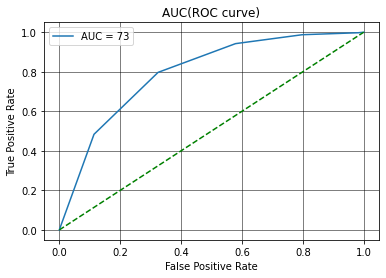

In [ ]:

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np 


y_scores = neigh.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)



plt.plot(fpr, tpr, label='AUC = 73')
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()


In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear', gamma='scale') # Linear Kernel

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('F1 score',f1_score(y_test, y_pred))
print('precision score',precision_score(y_test, y_pred))
print('recall score',recall_score(y_test, y_pred))

Accuracy: 87.13%
F1 score 0.9181141439205955
precision score 0.9090909090909091
recall score 0.9273182957393483


In [ ]:
!pip install pytorch_tabnet

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=d5e3cfcaa40e4683d95c072976ea5c62106c9927b0dbfca516eba280029563ff
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
import os
import wget
from pathlib import Path
from matplotlib import pyplot 
from sklearn.metrics import accuracy_score





from pytorch_tabnet.tab_model import TabNetClassifier
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
import os
import wget
from pathlib import Path
from matplotlib import pyplot 
from sklearn.metrics import accuracy_score

classifier = TabNetClassifier(verbose=0,seed=42,  n_d = 9, n_a=10)
classifier.fit(X_train=X_train.values, y_train=y_train.values,
               patience=5,max_epochs=50,
               eval_metric=['auc'])

y_pred = classifier.predict(X_test.values)
test_acc = accuracy_score(y_pred=y_pred, y_true=y_test)



print('Accuarcy',test_acc)
print('F1 score',f1_score(y_test, y_pred))
print('precision score',precision_score(y_test, y_pred))
print('recall score',recall_score(y_test, y_pred))

No early stopping will be performed, last training weights will be used.
Accuarcy 0.8109161793372319
F1 score 0.8901472253680635
precision score 0.8119834710743802
recall score 0.9849624060150376


In [ ]:
from sklearn.metrics import plot_roc_curve

def set_roc_plot():
  plt.title('Receiver Operating Characteristic Curve', fontdict = {'weight': 'bold', 'size': 13})
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.ylim([-0.01, 1.01])
  plt.ylabel('True Positive Rate', fontdict={'weight': 'normal', 'size': 12})
  plt.yticks(np.arange(0.0, 1.1, step=0.1))
  plt.xlim([-0.01, 1.01])
  plt.xlabel('False Positive Rate', fontdict={'weight': 'normal', 'size': 12})
  plt.xticks(np.arange(0.0, 1.1, step=0.1)) 

# Load Models 

In [ ]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split


clf_load_model = pickle.load(open('/content/drive/MyDrive/clf_final66.pickle.dat', 'rb'))
xg_load_model = pickle.load(open('/content/drive/MyDrive/model_final66.pickle.dat', 'rb'))

Trying to unpickle estimator DecisionTreeClassifier from version 0.22.2.post1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator RandomForestClassifier from version 0.22.2.post1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator LabelEncoder from version 0.22.2.post1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations


# SHAP

In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 16.0 MB/s 


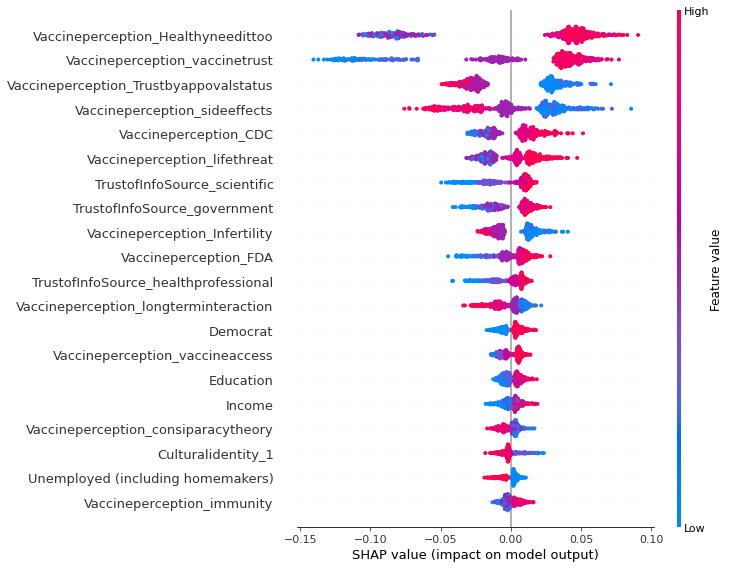

In [ ]:
import shap 
explainer = shap.TreeExplainer(clf_load_model, output_margin=True) 
shap_values = explainer.shap_values(X_test) 
shap.summary_plot(shap_values[1], X_test, max_display = 20) 

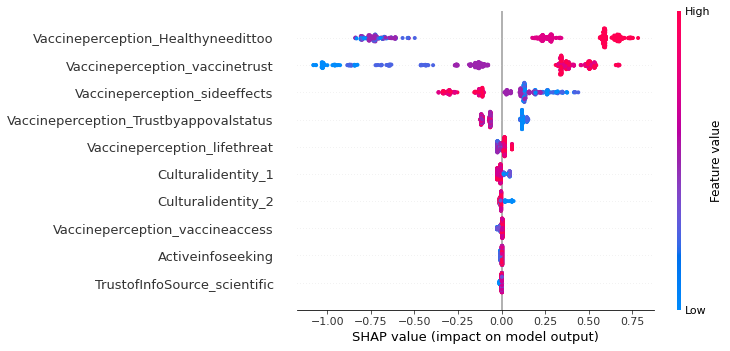

In [ ]:
import shap 
explainer = shap.TreeExplainer(xg_load_model, output_margin=True) 
shap_values = explainer.shap_values(X_test) 
shap.summary_plot(shap_values, X_test, max_display = 10) 